<a href="https://colab.research.google.com/github/RJ26012002/NLP-Project/blob/main/Fashion_MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/RJ26012002/NLP-Project.git

Cloning into 'NLP-Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 602 bytes | 200.00 KiB/s, done.


# **Fashion MNIST Project with Python , Keras and Deep Learning**

# **Import Libraries**

In [ ]:
import numpy as np                          # to perform calculations
import matplotlib.pyplot as plt             # to show images
import seaborn as sns                       # to show images
import tensorflow as tf
import keras                                # to build convolutional Nerwork

#**Load Data**
Loading data from keras database

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data() # here the dataset returns the data in the form of tuples of numpy arrays - (X_train,y_train),(X_test,y_test)

4422102/4422102 [==============================] - 1s 0us/step


### Printing shape of data

In [ ]:
X_train.shape , y_train.shape    # here we are printing the shape of training data in which X_train-(60000 images , of size 28 rows and 28 coloumns ) , y_train - (60000 labels )

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape , y_test.shape      # here we are printing the shape of test data in which X_test-(10000 images , of size 28 rows and 28 coloumns ) , y_test - (10000 labels )

((10000, 28, 28), (10000,))

Watching data of single image

In [ ]:
X_train[0]                       # here 0 - white pixel , 255 - black pixel and as we move from 0 to 255 the color intensity will be increases from white to black .
                                 # here each row have 28 pixel and in total we have 28 columns and 28 rows

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Printing label of first image

In [ ]:
y_train[0]

9

In [ ]:
class_labels= [	"T-shirt/top" ,	"Trouser",	"Pullover", "Dress", "Coat", "Sandal" , "Shirt",	"Sneaker", "Bag",	"Ankle boot" ]
class_labels
'''
Label	Description
0 -	T-shirt/top
1 -	Trouser
2 -	Pullover
3 -	Dress
4 -	Coat
5 -	Sandal
6 -	Shirt
7 -	Sneaker
8 -	Bag
9 -	Ankle boot

'''

'\nLabel\tDescription\n0 -\tT-shirt/top\n1 -\tTrouser\n2 -\tPullover\n3 -\tDress\n4 -\tCoat\n5 -\tSandal\n6 -\tShirt\n7 -\tSneaker\n8 -\tBag\n9 -\tAnkle boot\n\n'

#**Show Image**

 The label of this image is  Ankle boot - 9


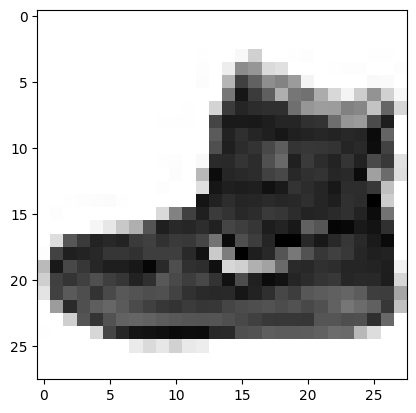

In [ ]:
plt.imshow(X_train[0],cmap="Greys")     # showing image using matplotlib function imshow()
print(" The label of this image is ",class_labels[y_train[0]],"-",y_train[0])

 The label of this image is  T-shirt/top - 0


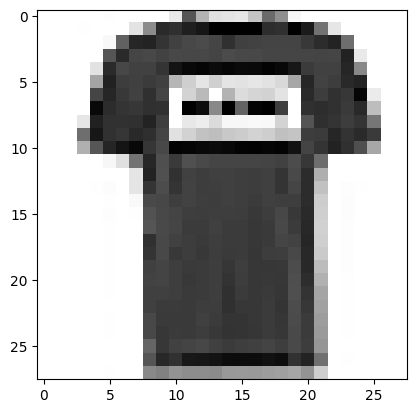

In [ ]:
plt.imshow(X_train[1],cmap="Greys")
print(" The label of this image is ",class_labels[y_train[1]],"-",y_train[1])

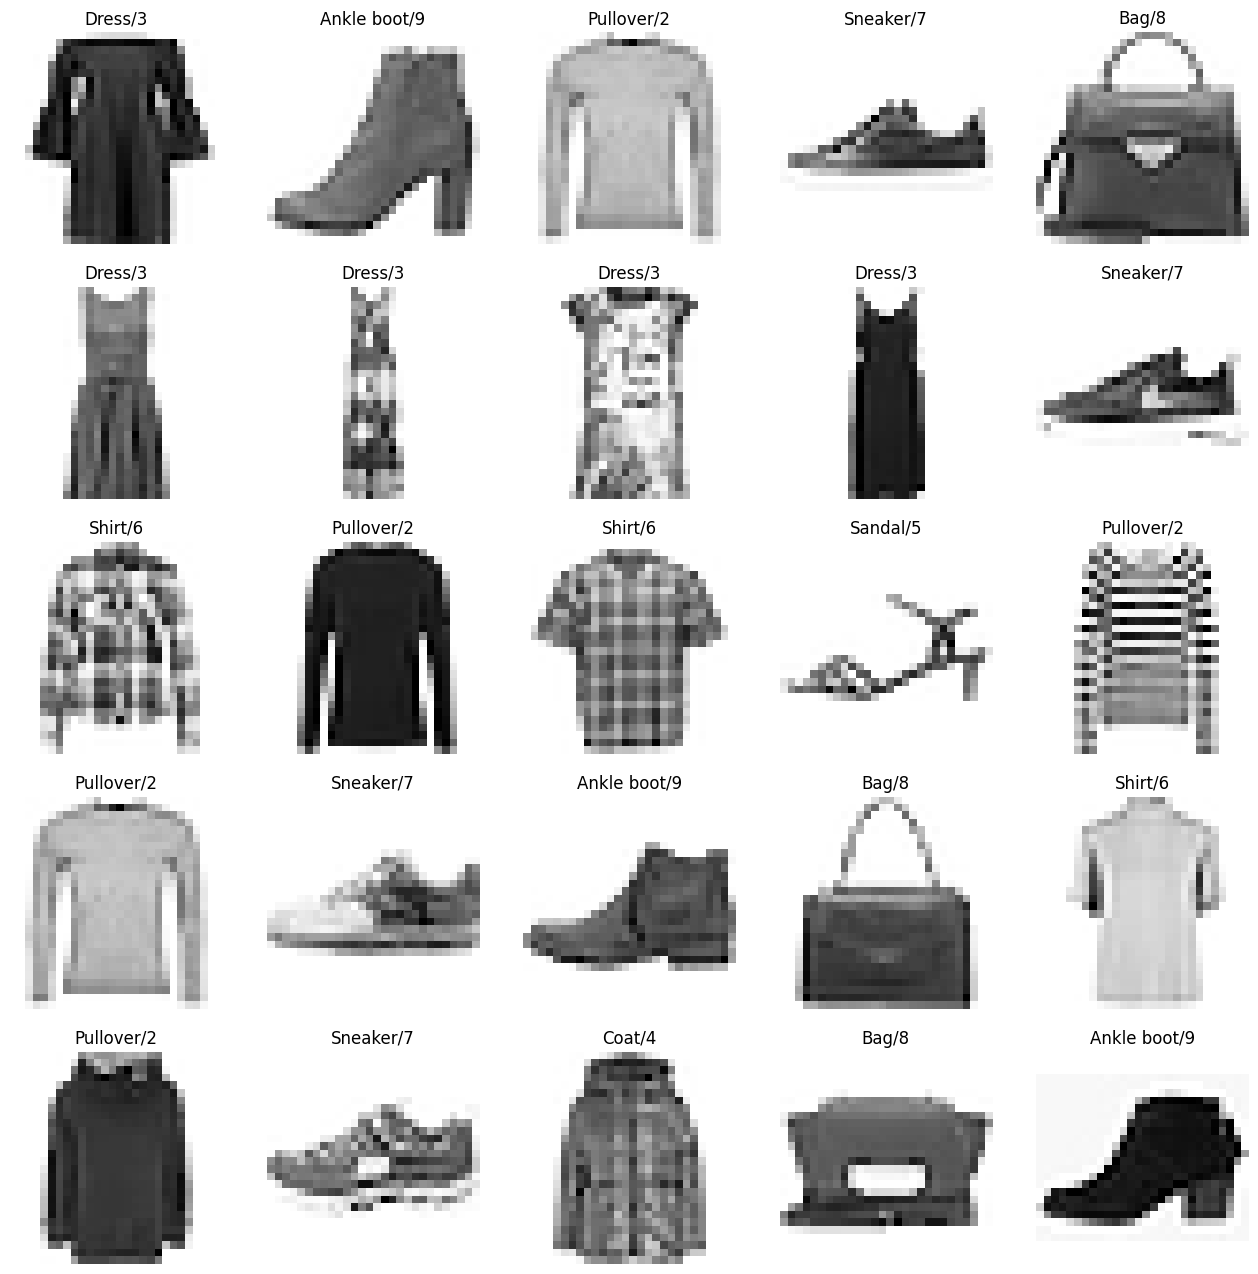

In [ ]:
plt.figure(figsize=(16,16))             # giving the image size we want

j=1
for i in np.random.randint(0,1000,25):  # here from the dataset of 60000 images we are randomly picking 25 images from range of 0 to 1000
  plt.subplot(5,5,j);j+=1               # creating subplot to show 25 images
  plt.imshow(X_train[i],cmap="Greys")   # showing random ith image from data set
  plt.axis('off')                       # removing axis
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))   # giving the title to image which includes the class labels name and label value

Checking the dimention of the data

In [ ]:
X_train.ndim

3

In [ ]:
X_train.shape

(60000, 28, 28)

Here the dimension of the data is 3 , but convolutional network take 4 dimension data . As The input data for a CNN is a 4D array of shape (batch_size, height, width, channels). The batch_size is the number of samples in each batch, height and width are the dimensions of the image and channels refer to the color channels of the image.

# Change Dimention

In [ ]:
X_train=np.expand_dims(X_train,-1)   # changing dimention of training data

In [ ]:
X_train.ndim

4

In [ ]:
X_train.shape   # here the batch_size of training data is 60000 images , dimensions(height , width) is 28 , 28 and channel is 1 (as our image is of single channel black and white )

(60000, 28, 28, 1)

In [ ]:
X_test=np.expand_dims(X_test,-1)     # changing dimention of test data

In [ ]:
X_test.ndim

4

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# Feature Scaling
scaling numeric features in the same scale

In [ ]:
X_train=X_train/255  # here data will be scaled in the range of 0 to 1
X_test=X_test/255


# Splitting Dataset
Here we will split the data in the form of **training data** , **test data** and **validation data** , as training data will going to train the convolutional network and during this training period validation data will be goint to test the training data that whether it is correct or not . So to **test data in training phase we use validation data**.


while **test data** will be used **to test after whole data is trained**.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_validation.shape,y_validation.shape

((12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building




In [ ]:
from matplotlib.cbook import flatten
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)),  # first layer - convolutional layer ,here we have taken
                                                    # Convo2D because we have 2D image , activation - relu(as it will make negetive values 0) , input_shape =(heigh,width,channel)
    keras.layers.MaxPool2D(pool_size=(2,2)),        # Second layer - We do max Pooling to downsample the given sample or we do it to decrease the image from big to small
    keras.layers.Flatten(),                         # Now converting all the images to single row or single vector or basically we flatten the images into single vector

    # Creating Neural Network
    # creating input layer
    keras.layers.Dense(units=128,activation='relu'), # to train neural network we use dense layer ,here we have taken 128 neurons in input layer and relu as an activation function
    # creating output layer
    keras.layers.Dense(units=10,activation='softmax') # here we have taken 10 neurons in output layer and softmax as an activation function as it will help us to find the probability
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

## **Summary of the model**
1. After giving input to the model the first layer which is convolutional layer gives the output of shape (None,26,26,32) and here the parameters are 320.
**Output Shape** (None,26,26,32) - here the first dimention represents the batch_size (as network does not know batch_size in advance) ,the second parameter is height (which is 26),third is width (which is 26) and last is depth(which is 32). Basically it is the output after processing input though first layer . So we can see that the dimention of the image has been reduced .

**Param** - These are the number of learnable parameters in the model.These are weights that are learned during training and contribute to the model’s predictive power. Here it is calculated as :
**number_parameters == output_channels * (input_channels * window_size + 1)**

**320= 32 * ( 1 * ( 3 * 3 ) + 1 )**

2. After first Convolutional layer the maxPooling layer decreases the dimension to - (None, 13, 13, 32)
3. After flatten we got the 5408 input features .
4. Then we apply the dense layer by taking 128 neurons as an input layer , here the param value is 692352 which is calculated as :
**Params = input_values*(neurons in first layer) + (bias values for neurons in first layer)**

**692352 = 5408 * 128 + 128**
5. Then we apply dense layer as an output layer by taking 10 neurons as an output layer and here the param value is 1290 which is calculated as :
**1290 = 128 * 10 + 10**

So we got total params as 693,962.


# Compiling Model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.
#loss= to find the error we use loss function


# Training Model

In [ ]:
history = model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))
# epochs =  The number of times the algorithm runs on the whole training dataset.
# batch_size = It denotes the number of samples to be taken to for updating the model parameters.
# verbose=1 - here it gives the progress bar that how our neural network is training .
# validation_data = we give to test the training data

Epoch 1/10
94/94 [==============================] - 11s 15ms/step - loss: 0.6524 - accuracy: 0.7777 - val_loss: 0.4637 - val_accuracy: 0.8364
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3859 - accuracy: 0.8637 - val_loss: 0.3780 - val_accuracy: 0.8641
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3328 - accuracy: 0.8825 - val_loss: 0.3308 - val_accuracy: 0.8827
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2987 - accuracy: 0.8949 - val_loss: 0.3216 - val_accuracy: 0.8869
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2822 - accuracy: 0.8995 - val_loss: 0.3058 - val_accuracy: 0.8914
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2629 - accuracy: 0.9048 - val_loss: 0.2883 - val_accuracy: 0.8974
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2484 - accuracy: 0.9101 - val_loss: 0.2806 - val_accuracy: 0.9018
Epoch 8/10
94/94 [

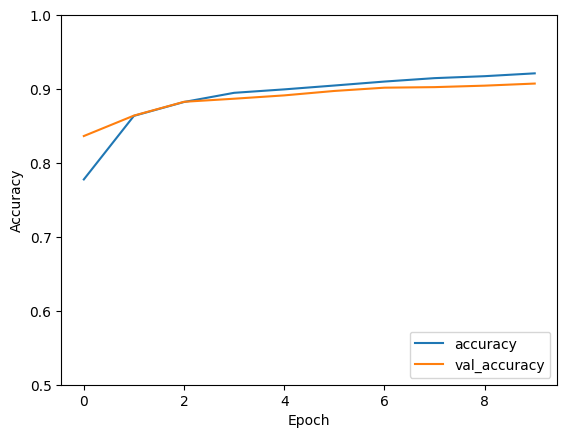

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Testing the Model

In [ ]:
# testing the first image
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 102ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

Here the model is predicting the 9th number class (as 9th number class has the highest probability)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2)) # the argmax() function will give us the exact or maximum value

1/1 [==============================] - 0s 22ms/step


9

In [ ]:
# now cross-checking the value with test data
y_test[0]

9

So here we can see that the actual and predicted values are same as the input image belongs to class 9 , so till now our model is working well .

In [ ]:
# predicting values for all data using model
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.31, 0.04, 0.02]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Evaluating the predicted values given by the model with the test data values
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.8993


[0.27177944779396057, 0.8992999792098999]

Here it is giving 90.25% accuracy so it is generalized model neither it is overfit nor underfit

# Visualizing Output

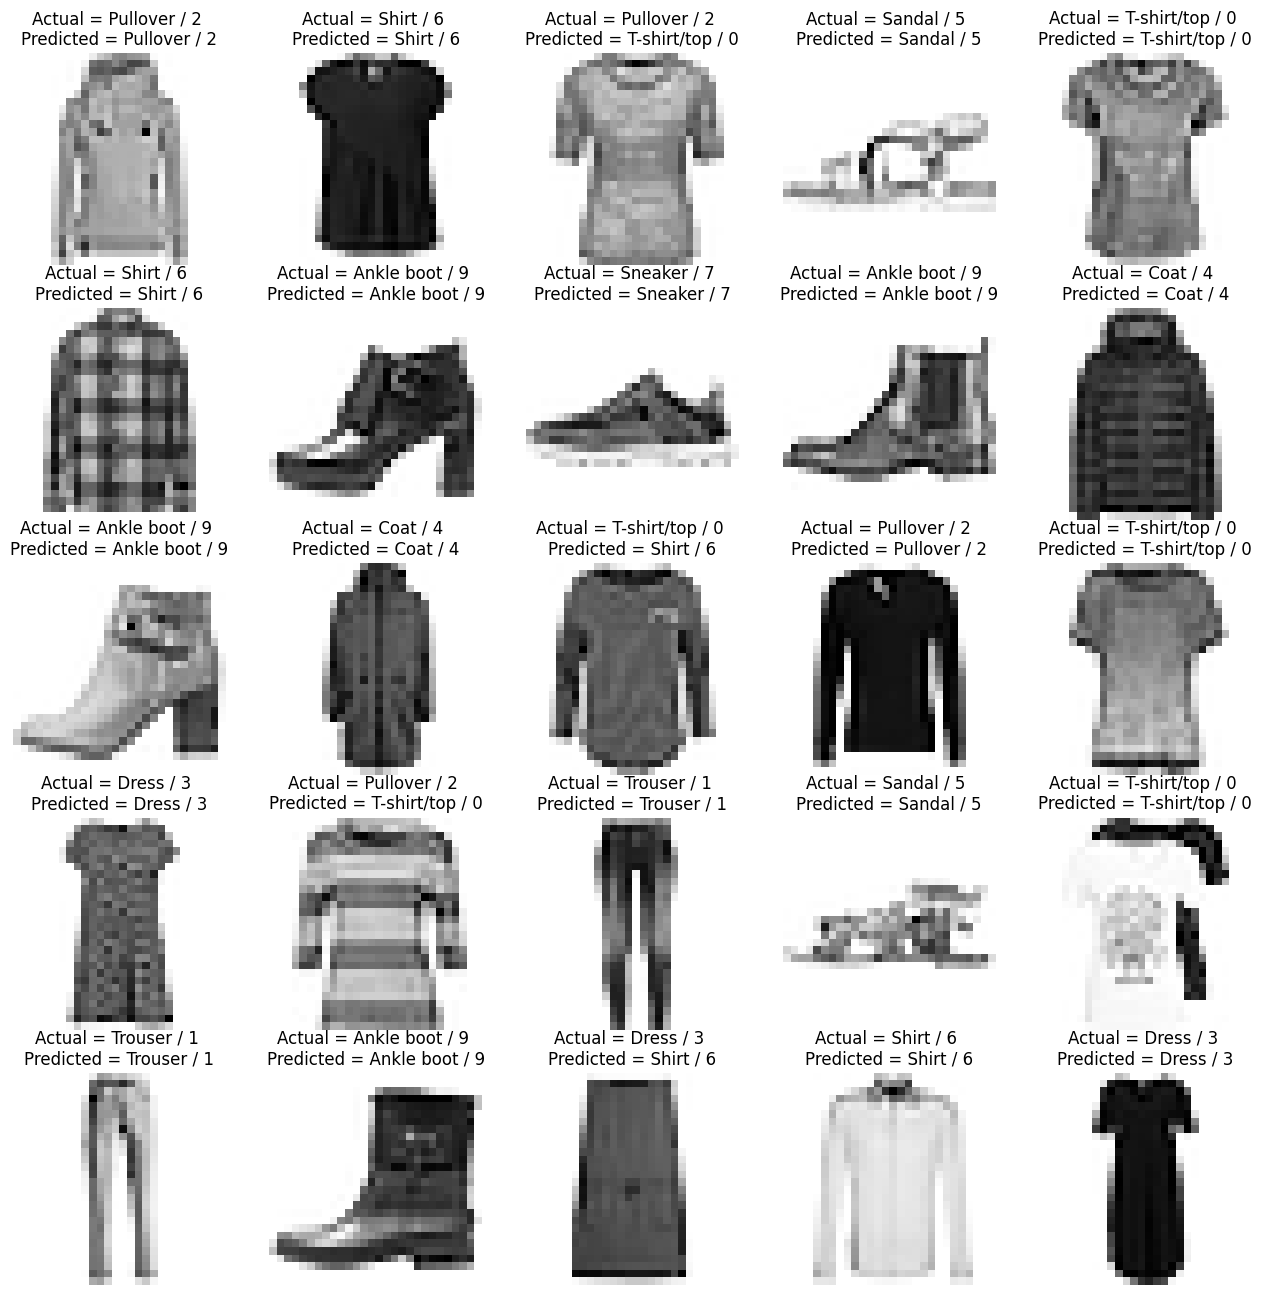

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')D

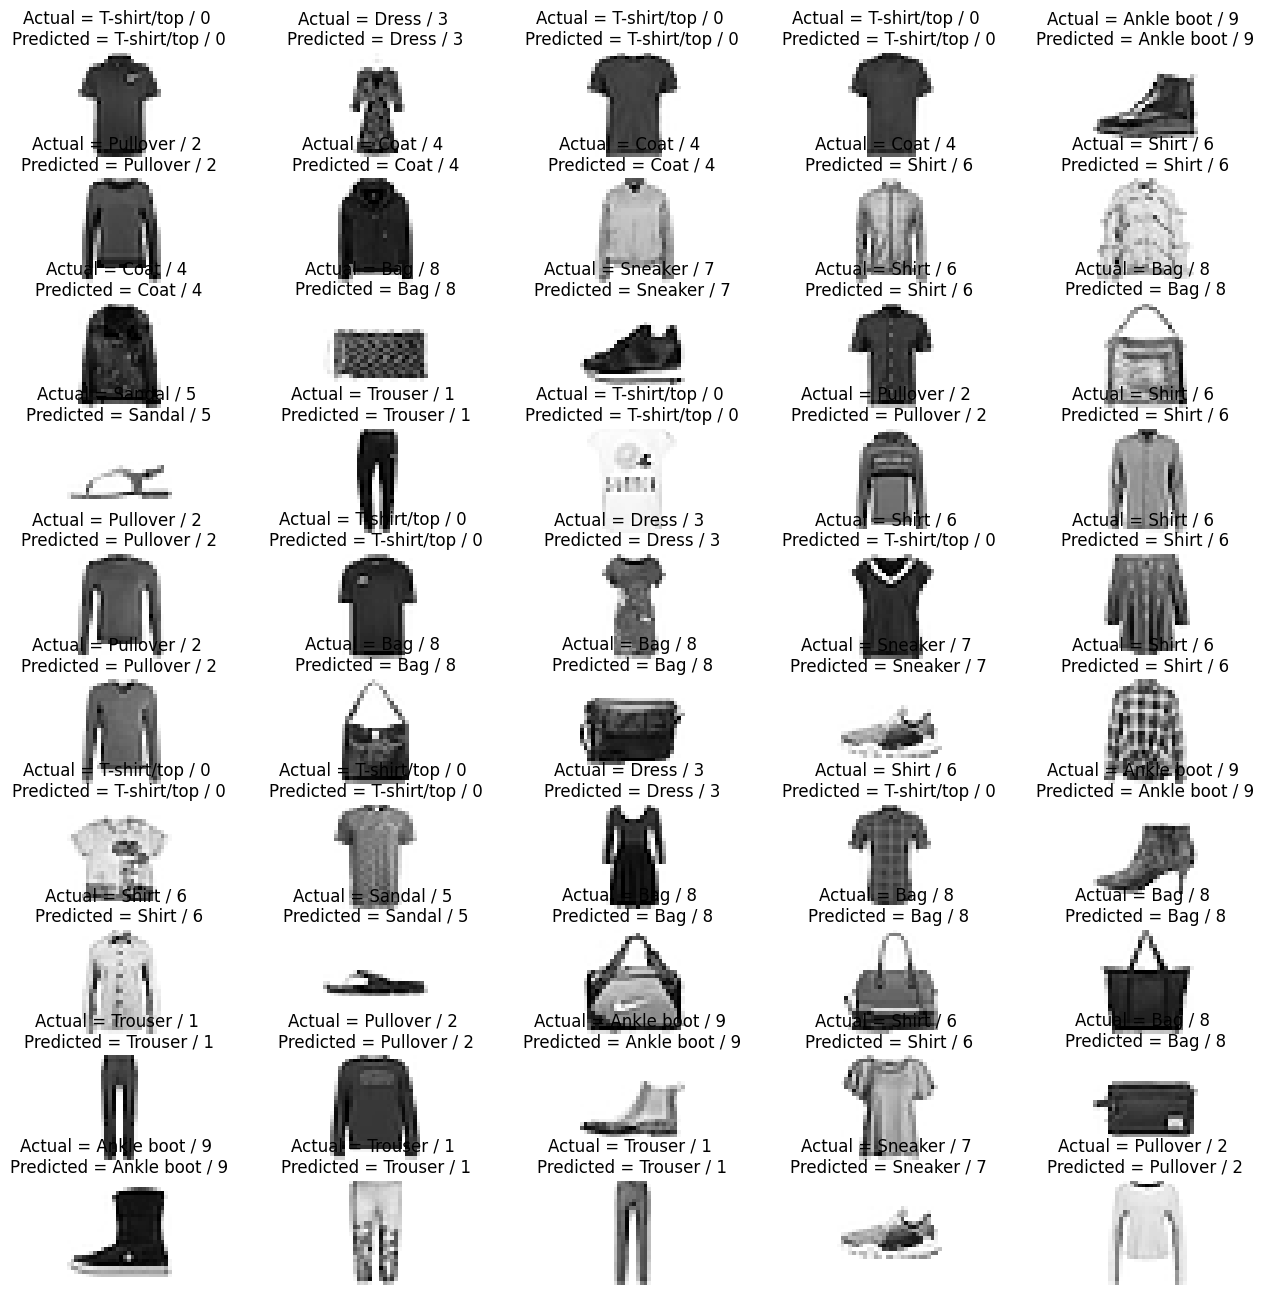

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,50):
  plt.subplot(10,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

# Confusion Matrix

<Axes: >

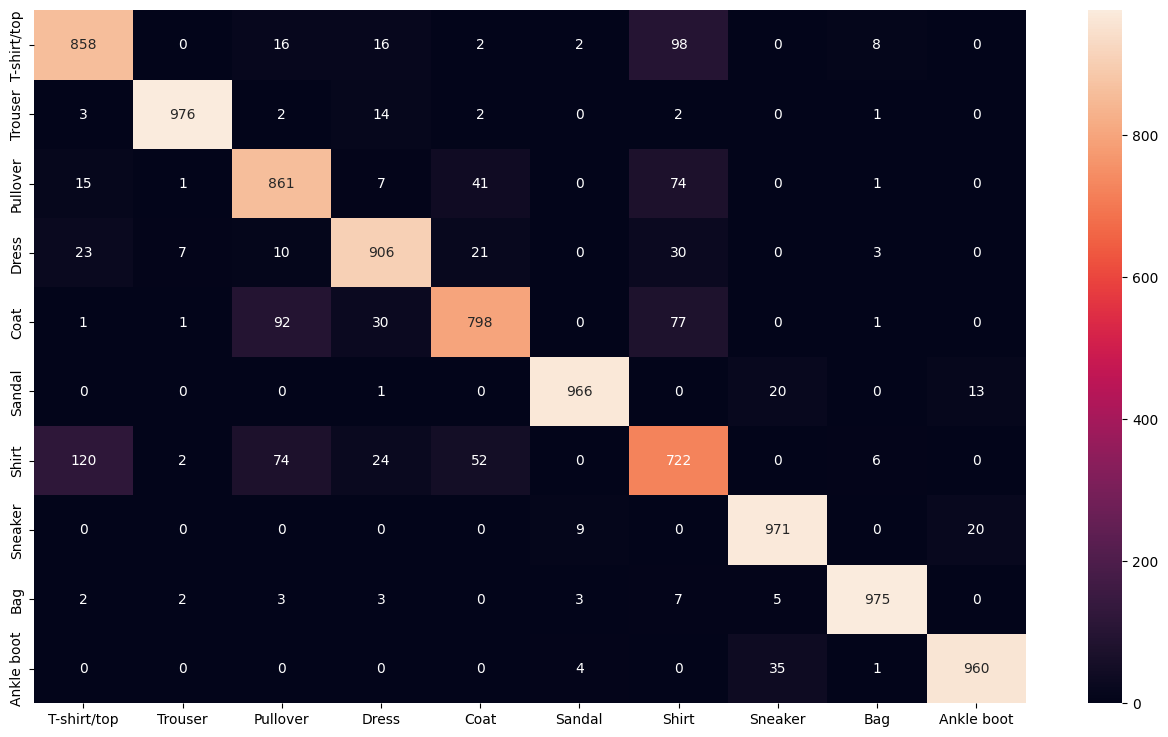

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[ np.argmax(label) for label in y_pred]
cm= confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)


# Calculating Precision , Recall Values
Precision = True_Positive/(True_Positve + False_Positive)

Recall = True_Positive/(True_Positive + False_Negetive)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.86      0.84      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.71      0.72      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/fashion_mnist_cnn_model_v2.h5'

In [ ]:
model.save(path)

# Build 2 Complex CNN
## Increasing Accuracy of the model by making it more complex.
This can be done by adding more hidden layers .

In [ ]:
# Building CNN model
cnn_model2 = keras.models.Sequential([
      keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                                                    # First Convolutional layer
      keras.layers.MaxPooling2D(pool_size=(2,2)),   # First MaxPooling Layer
      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'), # Second Convolutional Layer
      keras.layers.MaxPooling2D(pool_size=(2,2)),   # Second MaxPooling Layer
      keras.layers.Flatten(),                       # converting all the images to single row or single vector

# Creating Neural Network
      # Input layer
      keras.layers.Dense(units=128, activation='relu'), # Input layer with 128 neurons
      keras.layers.Dropout(0.25),                       # using dropout to save model from overfitting

      # First hidden Layer
      keras.layers.Dense(units=256, activation='relu'), # First Hidden Layer with 256 neurons
      keras.layers.Dropout(0.25),                       # using dropout to save model from overfitting
      # Second hidden Layer
      keras.layers.Dense(units=128, activation='relu'), # Second Hidden Layer with 128 neurons

      # Output Layer
      keras.layers.Dense(units=10, activation='softmax')# Output Layer with 10 neurons

  ])


In [ ]:
# Compiling the Model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Train the Model
history = cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/20
94/94 [==============================] - 4s 13ms/step - loss: 1.0327 - accuracy: 0.6102 - val_loss: 0.5681 - val_accuracy: 0.7793
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5529 - accuracy: 0.7902 - val_loss: 0.4626 - val_accuracy: 0.8277
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4590 - accuracy: 0.8319 - val_loss: 0.4009 - val_accuracy: 0.8503
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4041 - accuracy: 0.8528 - val_loss: 0.3722 - val_accuracy: 0.8632
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3648 - accuracy: 0.8664 - val_loss: 0.3440 - val_accuracy: 0.8741
Epoch 6/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3398 - accuracy: 0.8756 - val_loss: 0.3221 - val_accuracy: 0.8817
Epoch 7/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3164 - accuracy: 0.8845 - val_loss: 0.3092 - val_accuracy: 0.8863
Epoch 8/20
94/94 

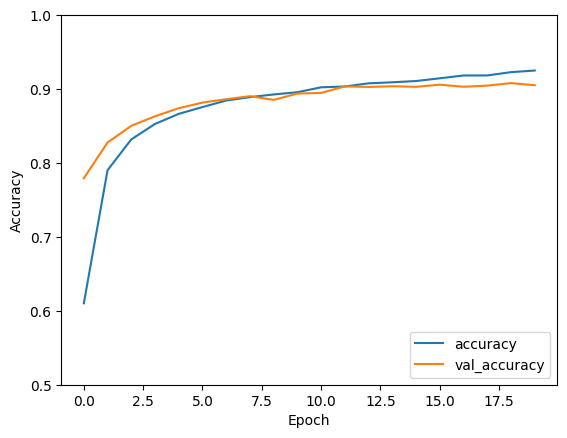

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluating the predicted values given by the model with the test data values
cnn_model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2713 - accuracy: 0.9052


[0.2712547183036804, 0.9052000045776367]

In [ ]:
# increasing Epochs
history = cnn_model2.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/30
94/94 [==============================] - 1s 13ms/step - loss: 0.1993 - accuracy: 0.9254 - val_loss: 0.2782 - val_accuracy: 0.9007
Epoch 2/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1943 - accuracy: 0.9280 - val_loss: 0.2674 - val_accuracy: 0.9067
Epoch 3/30
94/94 [==============================] - 1s 13ms/step - loss: 0.1867 - accuracy: 0.9294 - val_loss: 0.2586 - val_accuracy: 0.9106
Epoch 4/30
94/94 [==============================] - 1s 14ms/step - loss: 0.1825 - accuracy: 0.9330 - val_loss: 0.2630 - val_accuracy: 0.9083
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.1708 - accuracy: 0.9361 - val_loss: 0.2628 - val_accuracy: 0.9095
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.1725 - accuracy: 0.9361 - val_loss: 0.2590 - val_accuracy: 0.9098
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.1649 - accuracy: 0.9383 - val_loss: 0.2594 - val_accuracy: 0.9119
Epoch 8/30
94/94

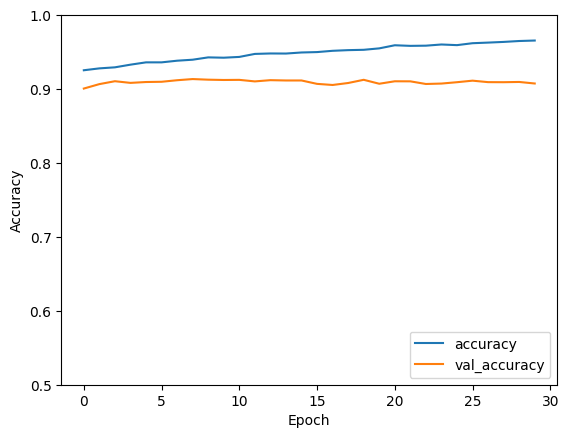

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
cnn_model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.9108


[0.3201386630535126, 0.9107999801635742]

### Here we get the highest accuracy of our model i.e., 91.07%

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')


## Precision and Recall values

In [ ]:
y_pred_1 = cnn_model2.predict(X_test)
y_pred_labels_1=[ np.argmax(label) for label in y_pred_1]

cr_1=classification_report(y_test,y_pred_labels_1,target_names=class_labels)
print(cr_1)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.83      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.74      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# **Building Very Complex Model**


In [ ]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                                               # First Convolutional Layer
    keras.layers.MaxPooling2D(pool_size=(2,2)),# First MaxPooling Layer
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'), # Second Convolutional Layer
    keras.layers.MaxPooling2D(pool_size=(2,2)),# Second MaxPooling Layer
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),  # Third Convolutional Layer
    keras.layers.MaxPooling2D(pool_size=(2,2)),# Third MaxPooling Layer
    keras.layers.Flatten(),

# Creating Neural Network

    # Input Layer
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),

    # First hidden Layer
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    # Second hidden Layer
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Third hidden Layer
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),

    # Output Layer
    keras.layers.Dense(units=10, activation='softmax')
 ])


In [ ]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Train the Model
history = cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/50
94/94 [==============================] - 5s 23ms/step - loss: 1.1753 - accuracy: 0.5387 - val_loss: 0.6341 - val_accuracy: 0.7504
Epoch 2/50
94/94 [==============================] - 1s 16ms/step - loss: 0.6036 - accuracy: 0.7708 - val_loss: 0.4879 - val_accuracy: 0.8082
Epoch 3/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4975 - accuracy: 0.8125 - val_loss: 0.4618 - val_accuracy: 0.8299
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4315 - accuracy: 0.8421 - val_loss: 0.3782 - val_accuracy: 0.8597
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3786 - accuracy: 0.8652 - val_loss: 0.3418 - val_accuracy: 0.8769
Epoch 6/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3355 - accuracy: 0.8806 - val_loss: 0.3190 - val_accuracy: 0.8812
Epoch 7/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3188 - accuracy: 0.8854 - val_loss: 0.3143 - val_accuracy: 0.8852
Epoch 8/50
94

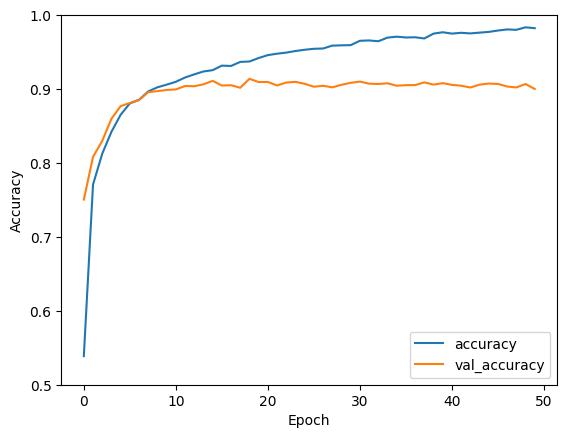

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
cnn_model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4955 - accuracy: 0.9050


[0.49547016620635986, 0.9049999713897705]

Here we have seen that as we have increased the density of our neural model , the model is overfitted . It can be normalize using regularization , batch_normalization , or we can reduce the complexity of our model.

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')
